In [156]:
import pandas as pd
import numpy as np
import gzip
import json

pd.set_option('display.max_columns', None)

def parse(path):
  g = open('Data/' + path, 'r')
  for l in g:
    yield json.loads(l)

def parse_first_n(path, n=10000):
    g = open('Data/' + path, 'r')
    for i, l in enumerate(g):
        if i >= n:
            break
        yield json.loads(l)




In [157]:
texas_metadata = pd.DataFrame(parse("meta-Texas.json"))
texas_reviews = pd.DataFrame(parse_first_n("review-Texas.json", n=1000000))

In [158]:
texas_reviews.head()


,user_id,name,time,rating,text,pics,resp,gmap_id
0,117660620017716077111,Jason “Jayway”,1609270072631,5.0,Great and clean and very well mannerisms,None,None,0x8638869e6b4e3529:0xe8d257447fe41672
1,108991048262705869218,Beejal S.,1452441095667,5.0,"Clean facilities (bathrooms / store / pumps), ...",None,None,0x8638869e6b4e3529:0xe8d257447fe41672
2,114559474816876245528,Jennifer Moore,1504740883990,5.0,None,None,None,0x8638869e6b4e3529:0xe8d257447fe41672
3,117243547986845088566,Doris Brucken,1595037430155,4.0,None,None,None,0x8638869e6b4e3529:0xe8d257447fe41672
4,105673564666699552444,RICK SWANK,1562686087188,5.0,Gold star Transportation was a great place to ...,None,None,0x864c3748dcc1c12d:0xbf904a61f262cf9b


In [159]:
texas_metadata.head()

,name,address,gmap_id,description,latitude,longitude,category,avg_rating,num_of_reviews,price,hours,MISC,state,relative_results,url
0,Timewise Food Store,"Timewise Food Store, 1600 W Church St, Livings...",0x8638869e6b4e3529:0xe8d257447fe41672,None,30.713368,-94.954344,[Convenience store],4.8,4,None,"[[Thursday, Open 24 hours], [Friday, Open 24 h...","{'Service options': ['In-store shopping', 'Del...",Open 24 hours,"[0x863886bab3f9bb05:0x28a8062d0597dd34, 0x8638...",https://www.google.com/maps/place//data=!4m2!3...
1,Goldstar Transit,"Goldstar Transit, 4415 W Dickson Ln, Little El...",0x864c3748dcc1c12d:0xbf904a61f262cf9b,None,33.159363,-96.975571,[Transportation service],4.5,4,None,"[[Thursday, 6AM–6PM], [Friday, 6AM–6PM], [Satu...",{'Accessibility': ['Wheelchair accessible entr...,Open ⋅ Closes 6PM,"[0x864c374855555555:0x3abb669a098bb235, 0x864c...",https://www.google.com/maps/place//data=!4m2!3...
2,Walmart Pharmacy,"Walmart Pharmacy, 12220 FM 423, Frisco, TX 75033",0x864c3998b8d8dc83:0x57ffabe1e2322320,None,33.179867,-96.883691,"[Pharmacy, Drug store, Medical supply store, V...",3.3,24,$,"[[Thursday, 9AM–9PM], [Friday, 9AM–9PM], [Satu...","{'Service options': ['Curbside pickup', 'In-st...",Open ⋅ Closes 9PM,"[0x864c3999b29e291f:0x2d364c05e88eec13, 0x864c...",https://www.google.com/maps/place//data=!4m2!3...
3,Luminous Logistics,"Luminous Logistics, 3838 W Miller Rd, Garland,...",0x864ea0993bffffff:0xb50b5bb2fccf9d9b,None,32.893678,-96.688611,[Delivery service],2.3,8,None,None,None,None,"[0x864ea09938bb619f:0x1b6902de2a2f3f96, 0x864e...",https://www.google.com/maps/place//data=!4m2!3...
4,Pacesetter Personnel Services,"Pacesetter Personnel Services, 2300 Valley Vie...",0x864e819d99a1ff99:0xeee31cc82854286c,None,32.839795,-97.020987,[Employment agency],2.1,7,None,None,None,None,"[0x864e9d6ea0c9089f:0x6f90f8b0b092af49, 0x864e...",https://www.google.com/maps/place//data=!4m2!3...


In [160]:
(texas_reviews.shape[0] - texas_reviews['user_id'].unique().shape[0]) / texas_reviews.shape[0] #less repeat

0.156983

In [161]:
texas_reviews.groupby('user_id').count().sort_values(by='name', ascending=False).head(10)

,name,time,rating,text,pics,resp,gmap_id
user_id,,,,,,,
108961844797544374233,84,84,84,80,0,0,84
108973179366153285961,63,63,63,53,0,5,63
107804532983162220398,50,50,50,50,49,0,50
108236566166190114222,46,46,46,15,1,3,46
107381198803730986646,36,36,36,2,0,1,36
107228328187777373321,36,36,36,18,1,1,36
108298174296070052064,35,35,35,35,0,1,35
108963137270649477900,31,31,31,2,0,8,31
101631569466903582646,31,31,31,17,8,6,31


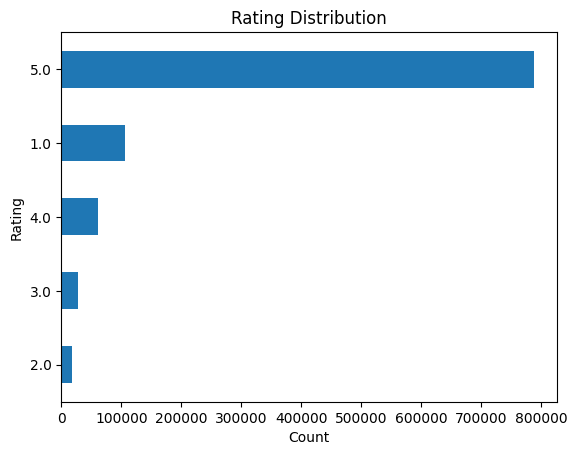

In [162]:
texas_reviews['rating'].value_counts().sort_values(ascending=True).plot(kind = 'barh', title='Rating Distribution', xlabel='Count', ylabel='Rating');

TEXAS doesnt have all of the data but so far these 1 star teviews are nearly double the 1 star. **DEFINETELY COULD BE A BIAS**

However metadata should be the same

In [163]:
(texas_metadata.shape[0] - texas_metadata['name'].unique().shape[0]) / texas_metadata.shape[0] #More repeats, 27%

0.2739619148964709

In [164]:
texas_metadata['name'].value_counts().sort_values(ascending=False).head(10)

name
Subway            2030
Dollar General    1655
Exxon             1549
Shell             1372
McDonald's        1200
Starbucks         1185
Family Dollar     1067
Valero            1029
Sonic Drive-In     970
T-Mobile           795
Name: count, dtype: int64

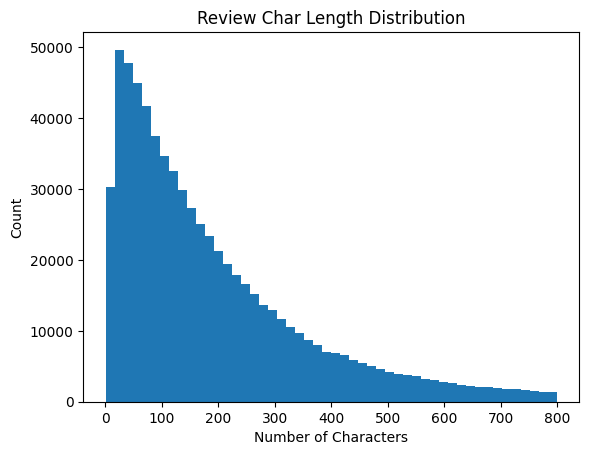

In [165]:
number_of_chars = texas_reviews['text'].apply(lambda x: len(x) if isinstance(x, str) and len(x) < 800 else None)
number_of_chars.plot(kind='hist', bins=50, title='Review Char Length Distribution', xlabel='Number of Characters', ylabel='Count');

In [239]:
np.percentile(number_of_chars.dropna(), 50)
number_of_chars.dropna().median()


np.float64(140.0)

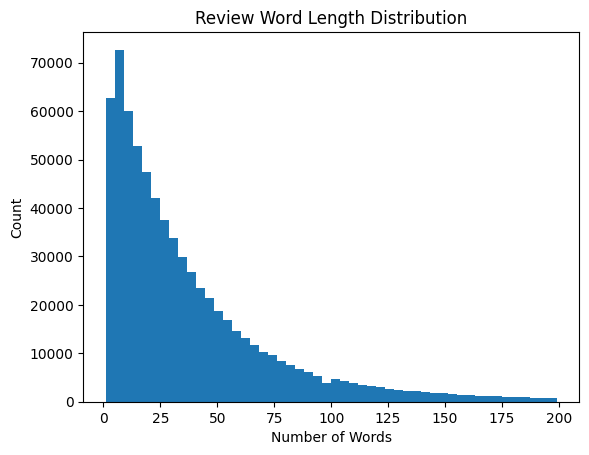

In [167]:
number_of_words = texas_reviews['text'].apply(lambda x: len(x.split()) if isinstance(x, str) and len(x.split()) < 200 else None)
number_of_words.plot(kind='hist', bins=50, title='Review Word Length Distribution', xlabel='Number of Words', ylabel='Count');

In [168]:
np.percentile(number_of_words.dropna(), 50) 

np.float64(25.0)

Texans write longer reviews, Have more chains/repeats, and SEEMS MUCH LESS PEOPLE REWRITE REVIEWS. However the longer rev and rewrites could be sampling error

In [169]:
texas_reviews.shape

(1000000, 8)

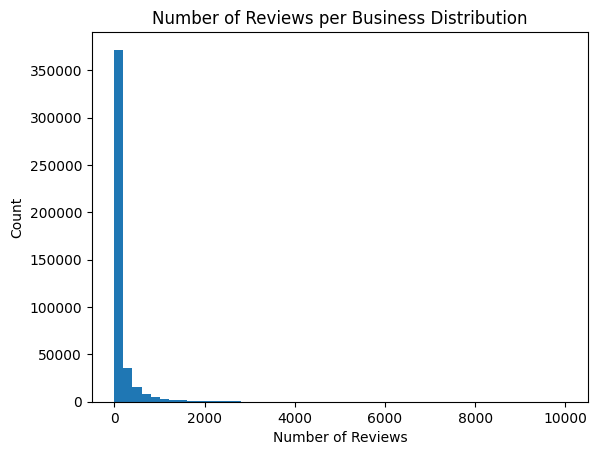

In [170]:
texas_metadata['num_of_reviews'].plot(kind='hist', bins=50, title='Number of Reviews per Business Distribution', xlabel='Number of Reviews', ylabel='Count');

In [171]:
(texas_metadata['gmap_id'].dropna().shape[0] - texas_metadata['gmap_id'].dropna().unique().shape[0]) /texas_metadata.shape[0]

0.005284878184004972

0.5 % of geompap IDs are repeated, HOW TO HANDLE THIS?


In [172]:
texas_metadata = texas_metadata.dropna(subset=['gmap_id', 'name']).drop_duplicates(subset=['gmap_id'], keep='first')

In [173]:
texas_merged = pd.merge(texas_reviews, texas_metadata, on = 'gmap_id', how='inner')

In [174]:
texas_merged.head() #name col needs to be renamed

,user_id,name_x,time,rating,text,pics,resp,gmap_id,name_y,address,description,latitude,longitude,category,avg_rating,num_of_reviews,price,hours,MISC,state,relative_results,url
0,117660620017716077111,Jason “Jayway”,1609270072631,5.0,Great and clean and very well mannerisms,None,None,0x8638869e6b4e3529:0xe8d257447fe41672,Timewise Food Store,"Timewise Food Store, 1600 W Church St, Livings...",None,30.713368,-94.954344,[Convenience store],4.8,4,None,"[[Thursday, Open 24 hours], [Friday, Open 24 h...","{'Service options': ['In-store shopping', 'Del...",Open 24 hours,"[0x863886bab3f9bb05:0x28a8062d0597dd34, 0x8638...",https://www.google.com/maps/place//data=!4m2!3...
1,108991048262705869218,Beejal S.,1452441095667,5.0,"Clean facilities (bathrooms / store / pumps), ...",None,None,0x8638869e6b4e3529:0xe8d257447fe41672,Timewise Food Store,"Timewise Food Store, 1600 W Church St, Livings...",None,30.713368,-94.954344,[Convenience store],4.8,4,None,"[[Thursday, Open 24 hours], [Friday, Open 24 h...","{'Service options': ['In-store shopping', 'Del...",Open 24 hours,"[0x863886bab3f9bb05:0x28a8062d0597dd34, 0x8638...",https://www.google.com/maps/place//data=!4m2!3...
2,114559474816876245528,Jennifer Moore,1504740883990,5.0,None,None,None,0x8638869e6b4e3529:0xe8d257447fe41672,Timewise Food Store,"Timewise Food Store, 1600 W Church St, Livings...",None,30.713368,-94.954344,[Convenience store],4.8,4,None,"[[Thursday, Open 24 hours], [Friday, Open 24 h...","{'Service options': ['In-store shopping', 'Del...",Open 24 hours,"[0x863886bab3f9bb05:0x28a8062d0597dd34, 0x8638...",https://www.google.com/maps/place//data=!4m2!3...
3,117243547986845088566,Doris Brucken,1595037430155,4.0,None,None,None,0x8638869e6b4e3529:0xe8d257447fe41672,Timewise Food Store,"Timewise Food Store, 1600 W Church St, Livings...",None,30.713368,-94.954344,[Convenience store],4.8,4,None,"[[Thursday, Open 24 hours], [Friday, Open 24 h...","{'Service options': ['In-store shopping', 'Del...",Open 24 hours,"[0x863886bab3f9bb05:0x28a8062d0597dd34, 0x8638...",https://www.google.com/maps/place//data=!4m2!3...
4,105673564666699552444,RICK SWANK,1562686087188,5.0,Gold star Transportation was a great place to ...,None,None,0x864c3748dcc1c12d:0xbf904a61f262cf9b,Goldstar Transit,"Goldstar Transit, 4415 W Dickson Ln, Little El...",None,33.159363,-96.975571,[Transportation service],4.5,4,None,"[[Thursday, 6AM–6PM], [Friday, 6AM–6PM], [Satu...",{'Accessibility': ['Wheelchair accessible entr...,Open ⋅ Closes 6PM,"[0x864c374855555555:0x3abb669a098bb235, 0x864c...",https://www.google.com/maps/place//data=!4m2!3...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999992,103038745309192206338,Riyazali Umatiya,1558471772628,1.0,None,None,None,0x8646813f87824399:0x41db45db94dbf2c3,Ruffino Meats & Food Services,"Ruffino Meats & Food Services, 2130 E William ...",None,30.672425,-96.341592,[Meat wholesaler],4.5,33,None,"[[Friday, 7AM–4PM], [Saturday, 7AM–12PM], [Sun...",{'Accessibility': ['Wheelchair accessible entr...,Open ⋅ Closes 4PM,"[0x864683d7a6b00021:0x3cdcd4e45c3c82a, 0x86468...",https://www.google.com/maps/place//data=!4m2!3...
999993,103590580446661133505,Tina Vanderwater,1540521771052,3.0,None,None,None,0x8646813f87824399:0x41db45db94dbf2c3,Ruffino Meats & Food Services,"Ruffino Meats & Food Services, 2130 E William ...",None,30.672425,-96.341592,[Meat wholesaler],4.5,33,None,"[[Friday, 7AM–4PM], [Saturday, 7AM–12PM], [Sun...",{'Accessibility': ['Wheelchair accessible entr...,Open ⋅ Closes 4PM,"[0x864683d7a6b00021:0x3cdcd4e45c3c82a, 0x86468...",https://www.google.com/maps/place//data=!4m2!3...
999994,103382831829531864671,benny koshy,1577999494016,5.0,None,None,None,0x8646813f87824399:0x41db45db94dbf2c3,Ruffino Meats & Food Services,"Ruffino Meats & Food Services, 2130 E William ...",None,30.672425,-96.341592,[Meat wholesaler],4.5,33,None,"[[Friday, 7AM–4PM], [Saturday, 7AM–12PM], [Sun...",{'Accessibility': ['Wheelchair accessible entr...,Open ⋅ Cl

In [175]:
texas_metadata['gmap_id'].unique().shape[0] - texas_merged['gmap_id'].unique().shape[0]

405378

(25.5, 36.4)

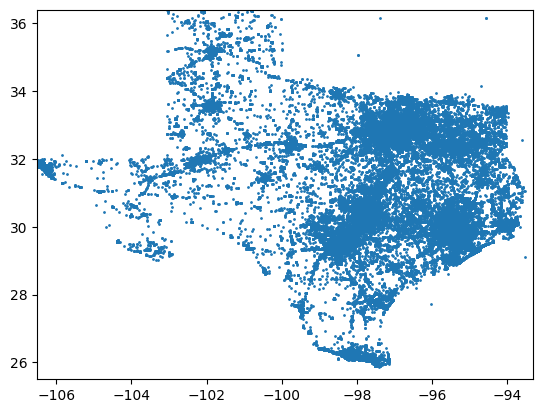

In [176]:
import matplotlib.pyplot as plt
plt.plot(texas_metadata['longitude'], texas_metadata['latitude'], 'o', markersize=1)
plt.xlim([-106.50, -93.31])
plt.ylim([25.50,36.40])

(25.5, 36.4)

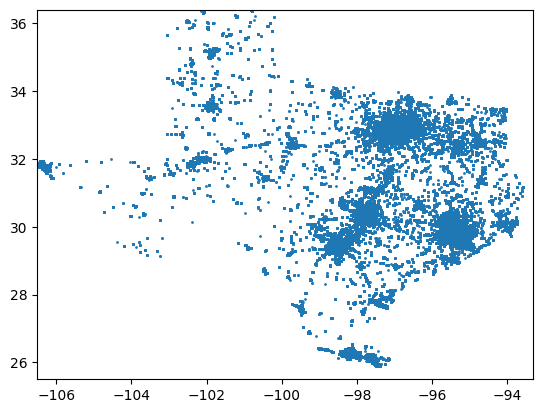

In [177]:
plt.plot(texas_merged['longitude'], texas_merged['latitude'], 'o', markersize=1)
plt.xlim([-106.50, -93.31])
plt.ylim([25.50,36.40])

Texas
Traditional abbreviation	Tex.
Latitude	25°50′ N to 36°30′ N
Longitude	93°31′ W to 106°39′ W
Website	texas.gov


We were able to plot texas with the first 1M rows of the data, and it looks like a fairly representative plot of the state without any outliers, so we can proceed with continueing with this data **FILTERING the businesses TO THE LAT AND LONG LIMITS ABOVE**

In [178]:
texas_merged = texas_merged[(texas_merged['latitude'] >= 25.5) & (texas_merged['latitude'] <= 36.40)
                            & (texas_merged['longitude'] >= -106.50) & (texas_merged['longitude'] <= -93.31)]

                            

In [179]:
texas_merged.shape #Now 'texas_merged' is filtered and dups are dropped

(995547, 22)

Now lets explore the threshold for what a "Brand" is to see if there is a thershold 

Text(0.5, 0, 'number of locaitons')

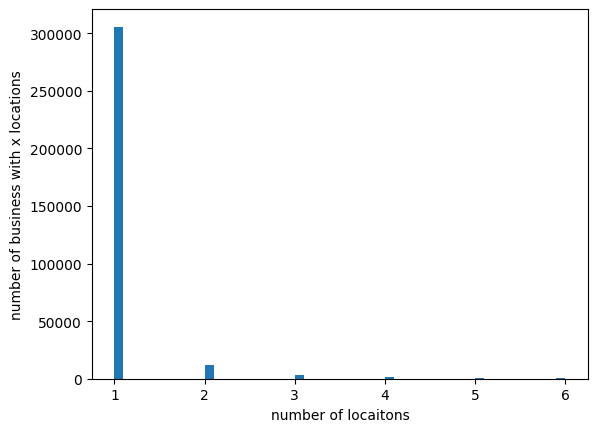

In [181]:
texas_metadata.groupby(['name']).count()['gmap_id'] 

name
" Terrell's Own Little Antique Mall"                      1
"A" Bail Bonds                                            1
"Al Carbon" CULEBRA #1                                    1
"Al Carbon" Pollos Asados Nacogdoches                     1
"Al Carbon" goliad                                        1
                                                         ..
🦶 Reflexology Canyon West Shopping Center                 1
🦶 Reflexology Reflexology Spa West End Shopping Center    1
🦶 Relax Reflexology Summit Shopping Center Amarillo       1
🦶 Relax Reflexology massage                               1
🦶 Relaxinghouse                                           1
Name: gmap_id, Length: 324766, dtype: int64

In [182]:
texas_metadata['name'] = texas_metadata['name'].apply(lambda x: x.strip())

***Looking at this it seems that some companies are treated AS DIFFERENT WHEN THEY ARE THE SAME, maybe we could come up with somthing to concatinate certain rows of the same companies***

In [183]:
np.percentile(texas_metadata.groupby(['name']).count()['gmap_id'], 94) #only 5% of companies have more than one location

np.float64(1.0)

Text(0.5, 0, 'number of locaitons')

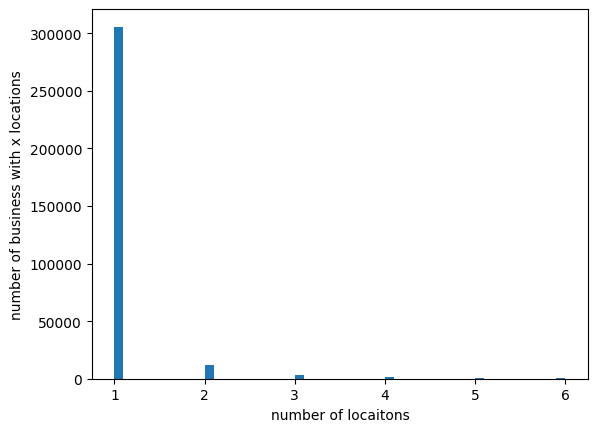

In [184]:
texas_metadata.groupby(['name']).count()[texas_metadata.groupby(['name']).count()['gmap_id'] < 7]['gmap_id'].plot(kind = 'hist', bins = 50);
plt.ylabel('number of business with x locations')
plt.xlabel('number of locaitons')

**I also want to look into the 'state' column**

In [192]:
texas_metadata.groupby('state').count().sort_values(by='name', ascending=False).head(10)

,name,address,gmap_id,description,latitude,longitude,category,avg_rating,num_of_reviews,price,hours,MISC,relative_results,url
state,,,,,,,,,,,,,,
Permanently closed,26340,26100,26340,7073,26340,26340,26117,26340,26340,6935,26340,17205,23976,26340
Open 24 hours,21160,19594,21160,3306,21160,21160,21136,21160,21160,3445,21160,15737,19086,21160
Closed ⋅ Opens 9AM,17639,17220,17639,1946,17639,17639,17634,17639,17639,1694,17639,15445,16617,17639
Closed ⋅ Opens 8AM,16763,16029,16763,1664,16763,16763,16755,16763,16763,1629,16763,14023,15716,16763
Closed ⋅ Opens 10AM,15615,15508,15615,4289,15615,15615,15614,15615,15615,3289,15615,14390,14495,15615
Closed ⋅ Opens 8AM Mon,14460,13859,14460,243,14460,14460,14452,14460,14460,197,14460,11917,13835,14460
Open ⋅ Closes 5PM,13120,12710,13120,522,13120,13120,13113,13120,13120,318,13120,10883,12489,13120
Open ⋅ Closes 6PM,10950,10604,10950,857,10950,10950,10947,10950,10950,592,10950,9407,10311,10950
Closed ⋅ Opens 9AM Mon,9768,9500,9768,341,9768,9768,9765,9768,9768,247,9768,8285,9257,9768


In [196]:
np.percentile(texas_metadata['num_of_reviews'], 50)

np.float64(37.0)

In [198]:
texas_merged.groupby('price').count() #very few prices prob shouldn't use this

,user_id,name_x,time,rating,text,pics,resp,gmap_id,name_y,address,description,latitude,longitude,category,avg_rating,num_of_reviews,hours,MISC,state,relative_results,url
price,,,,,,,,,,,,,,,,,,,,,
$,22972,22972,22972,22972,14622,455,2210,22972,22972,22906,13436,22972,22972,22954,22972,22972,21774,22517,21779,21261,22972
$$,22243,22243,22243,22243,15404,441,2575,22243,22243,22241,11255,22243,22243,22083,22243,22243,20328,21739,20734,20494,22243
$$$,1390,1390,1390,1390,938,30,222,1390,1390,1390,1221,1390,1390,1390,1390,1390,1234,1379,1234,1356,1390
$$$$,86,86,86,86,72,6,1,86,86,86,68,86,86,86,86,86,86,86,86,78,86


In [208]:
texas_metadata.explode('category').groupby('category').count().sort_values(by= 'name', ascending=False)

,name,address,gmap_id,description,latitude,longitude,avg_rating,num_of_reviews,price,hours,MISC,state,relative_results,url
category,,,,,,,,,,,,,,
Restaurant,29828,29797,29828,17502,29828,29828,29828,29828,20253,27732,29676,20196,26222,29828
Fast food restaurant,15257,15252,15257,13980,15257,15257,15257,15257,14309,14693,15251,9710,14490,15257
Gas station,12600,12600,12600,1188,12600,12600,12600,12600,3221,9209,11648,9573,11496,12600
Mexican restaurant,11545,11533,11545,4513,11545,11545,11545,11545,7778,11112,11516,8249,10727,11545
Auto repair shop,10669,10617,10669,32,10669,10669,10669,10669,197,9608,10010,9088,10109,10669
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Electrical appliance wholesaler,1,1,1,0,1,1,1,1,0,1,1,1,1,1
Stationery manufacturer,1,1,1,0,1,1,1,1,0,1,1,1,1,1
State office of education,1,1,1,0,1,1,1,1,0,1,1,1,1,1


***Here there are many CATEGORIES BUT I BELIEVE WE CAN COMPAIR COMPANIES FOR A COMPARATIVE ANALYSIS ACROSS CATEGORIES***

In [215]:
closed_metadata = texas_metadata[texas_metadata['state'] == 'Permanently closed']
never_closed_metadata = texas_metadata[texas_metadata['state'] != 'Permanently closed']

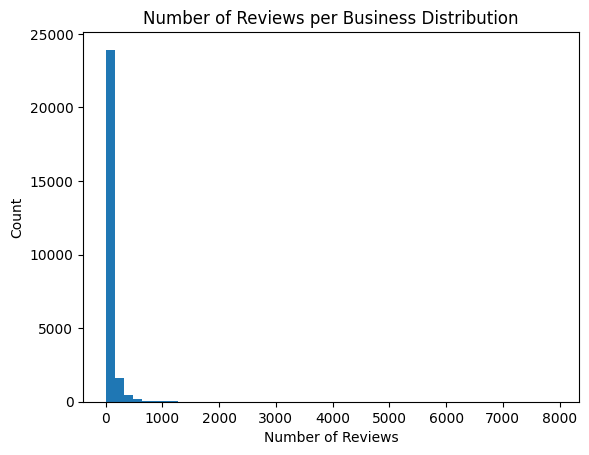

In [216]:
closed_metadata['num_of_reviews'].plot(kind='hist', bins=50, title='Number of Reviews per Business Distribution', xlabel='Number of Reviews', ylabel='Count');

In [223]:
closed_metadata['avg_rating'].mean()

np.float64(4.081051632498101)

In [224]:
texas_metadata['avg_rating'].mean()

np.float64(4.249072810919053)

In [225]:
never_closed_metadata['avg_rating'].mean()

np.float64(4.259645204213021)

In [226]:
def central_limit_95_percent_confidence_interval(data):
    mean = np.mean(data)
    std_error = np.std(data, ddof=1) / np.sqrt(len(data))
    margin_of_error = 1.96 * std_error
    return mean - margin_of_error, mean + margin_of_error

In [235]:
central_limit_95_percent_confidence_interval(closed_metadata['avg_rating'].dropna())

(np.float64(4.072729711146729), np.float64(4.089373553849474))

In [236]:
closed_merged = texas_merged[texas_merged['state'] == 'Permanently closed']

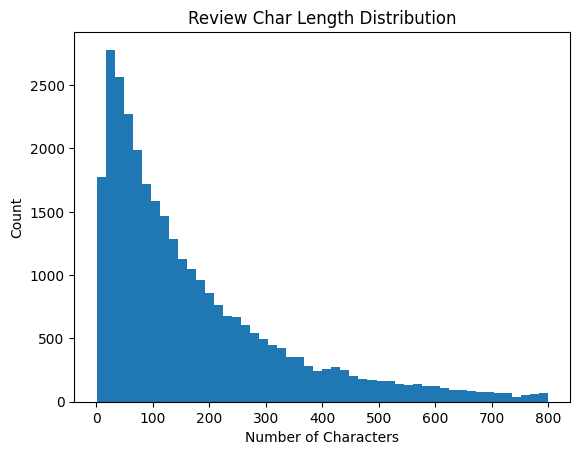

In [237]:
closed_chars = closed_merged['text'].apply(lambda x: len(x) if isinstance(x, str) and len(x) < 800 else None)
closed_chars.plot(kind='hist', bins=50, title='Review Char Length Distribution', xlabel='Number of Characters', ylabel='Count');

In [238]:
closed_chars.median()

np.float64(118.0)

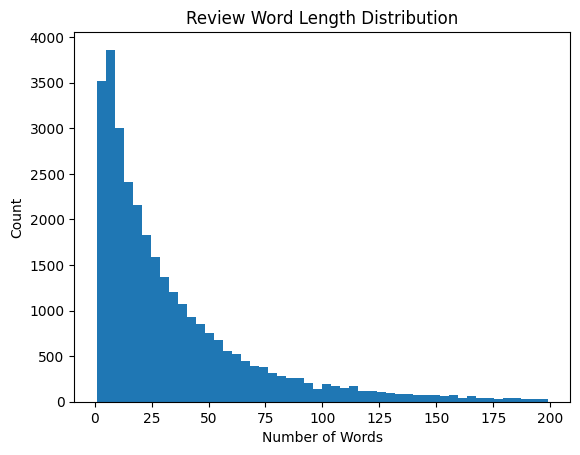

In [241]:
closed_words = closed_merged['text'].apply(lambda x: len(x.split()) if isinstance(x, str) and len(x.split()) < 200 else None)
closed_words.plot(kind='hist', bins=50, title='Review Word Length Distribution', xlabel='Number of Words', ylabel='Count');

In [242]:
closed_words.median()

np.float64(22.0)